# **NETFLIX RECOMMENDATION MOVIE:**


### 1.DATA Preparation

In [1]:
from google.colab import drive
drive.mount("/content/drive")

path = "/content/drive/MyDrive/ProjectPython/Recommendation/Movie"
%cd $path
%pwd

Mounted at /content/drive
/content/drive/MyDrive/ProjectPython/Recommendation/Movie


'/content/drive/MyDrive/ProjectPython/Recommendation/Movie'

In [2]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import string #because our data types are object
from wordcloud import WordCloud # visualize the importance or frequency
                                   # in the text
import pickle # Save machine learning model
              # converting Python object into a byte stream
from sklearn.feature_extraction.text import TfidfVectorizer # term-frequency
                                                           # inverse document frequency
from sklearn.metrics.pairwise import cosine_similarity # similarity among terms
from scipy.sparse import save_npz
import warnings
warnings.filterwarnings('ignore')

In [3]:
#show dataframe
df = pd.read_csv('netflix_data.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
#overall
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


* ## Pre-processing:

In [6]:
def preprocessing_data(df):
  # fill missing data = ""
  print("Sample size: ", len(df))
  df.fillna("", inplace = True)
  df = df
  print("Sample size after preprocessing: ", len(df))
  return df

In [7]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [8]:
df.duplicated().sum()

0

In [9]:
df = preprocessing_data(df.copy())

Sample size:  8807
Sample size after preprocessing:  8807


In [10]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


* ## Exploration Data Analysic

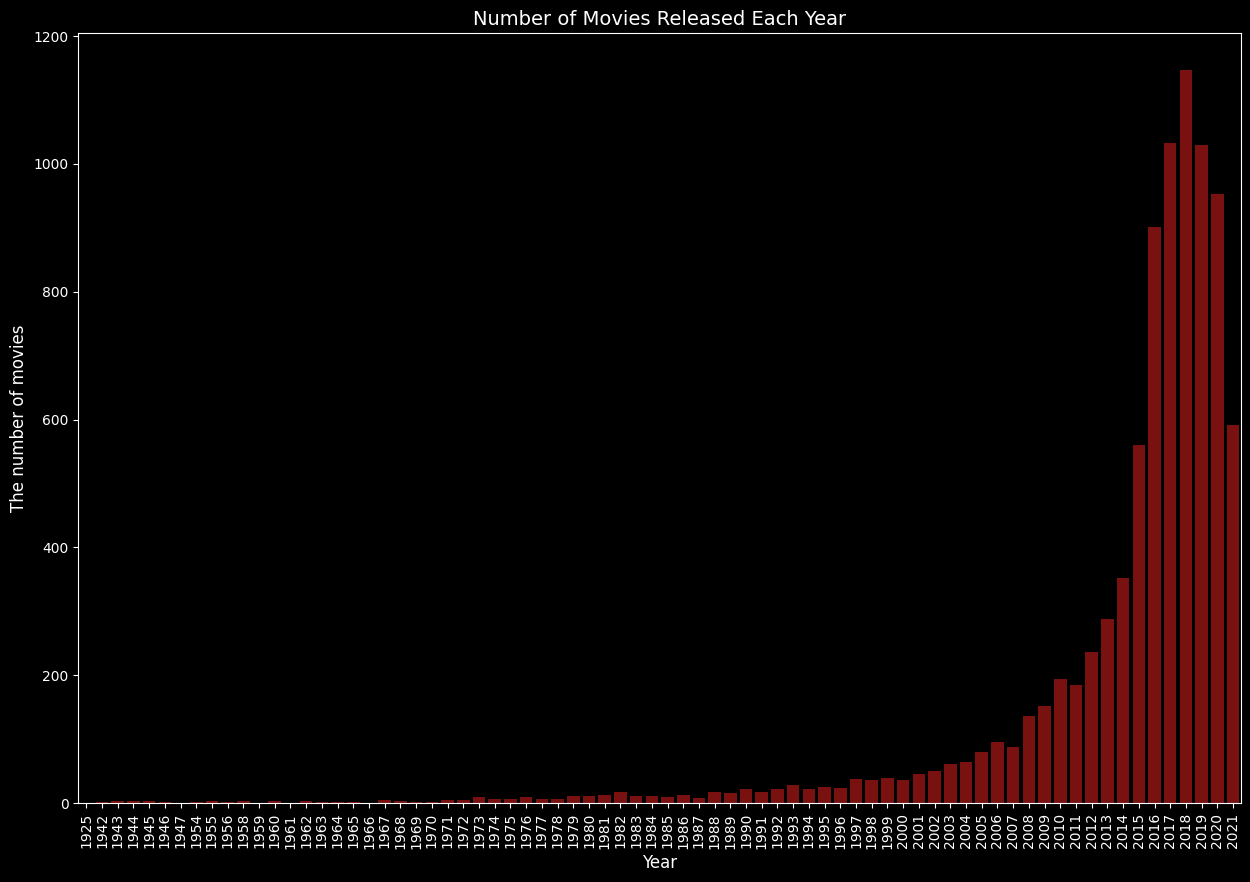

In [11]:
# Release year of movies on Netfilx
# Count the number of movies released each year and sort by year
movie_counts = df['release_year'].value_counts().sort_index()

# Convert the series to a DataFrame and reset the index
movie_counts = pd.DataFrame(movie_counts).reset_index()

# Rename the columns for clarity
movie_counts.columns = ['release_year', 'movie_count']

#Set the style and background color
plt.style.use('dark_background')
# The pallete
fig, ax = plt.subplots(figsize=(15,10))
# Create the bar plot
sns.barplot(data=movie_counts, x='release_year', y='movie_count', ax=ax, color = "DarkRed")

ax.set_title('Number of Movies Released Each Year', fontsize=14, color='white')
ax.set_xlabel('Year', fontsize=12, color='white')
ax.set_ylabel('The number of movies', fontsize=12, color='white')
plt.xticks(rotation=90, color='white')
plt.yticks(color='white')
# Display the plot
plt.show()

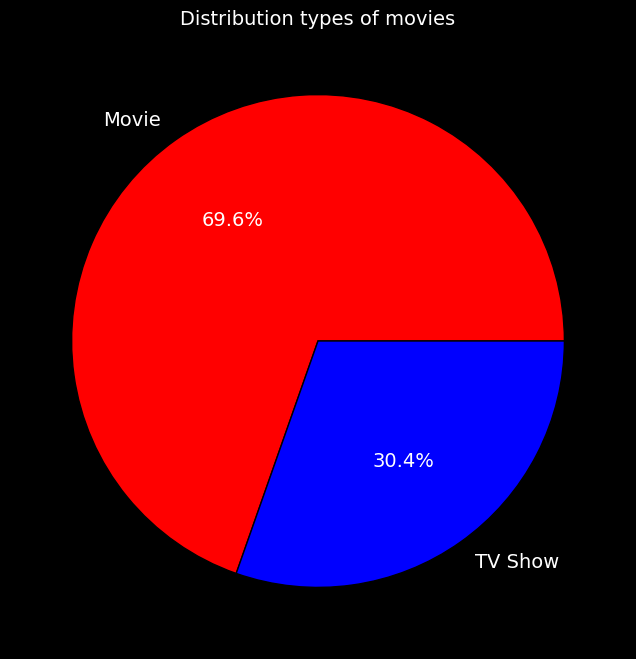

In [12]:
movie_types = df['type'].value_counts()

#Set the style and background color
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8,8))

# Create a pie chart
wedges, texts, autotexts = plt.pie(
    movie_types.values,           # Pie chart data
    labels=movie_types.index,     # Labels for each slice
    autopct='%1.1f%%',            # Format for the percentage
    wedgeprops=dict(edgecolor='black'),
    textprops=dict(color='white', fontsize=14),
    colors=['red','blue']
)
# Set the title
plt.title('Distribution types of movies', fontsize=14, color='white')
# Display the plot
plt.show()

In [13]:
top_countries = df['country'].value_counts().head(10)

fig = px.treemap(names=top_countries.index,
                 parents= ['' for _ in top_countries.index],
                 values=top_countries.values)
# Update the appearance
fig.update_traces(
    root_color='black'
)
fig.update_layout(
    title='Top Countries Using Netflix',
    plot_bgcolor='black',        # Background color of the plotting area
    paper_bgcolor='black',       # Background color of the entire figure
    font_color='white',          # Font color for text
)

# Display the charts
fig.show()


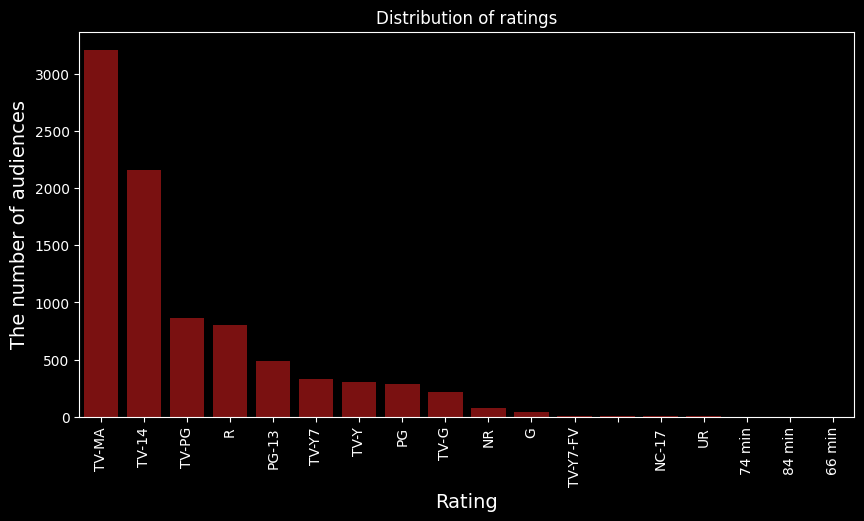

In [14]:
ratings = df['rating'].value_counts()

# Create DataFrame for ratings
ratings_df = pd.DataFrame({
    'rating': ratings.index,
    'count': ratings.values})

# Set the style of charts
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=ratings_df, x='rating', y='count', ax=ax, color = 'darkred')
plt.title('Distribution of ratings')
ax.set_xlabel('Rating', fontsize= 14, color='white')
ax.set_ylabel('The number of audiences', fontsize= 14, color='white')
plt.xticks(rotation=90)

# Display
plt.show()

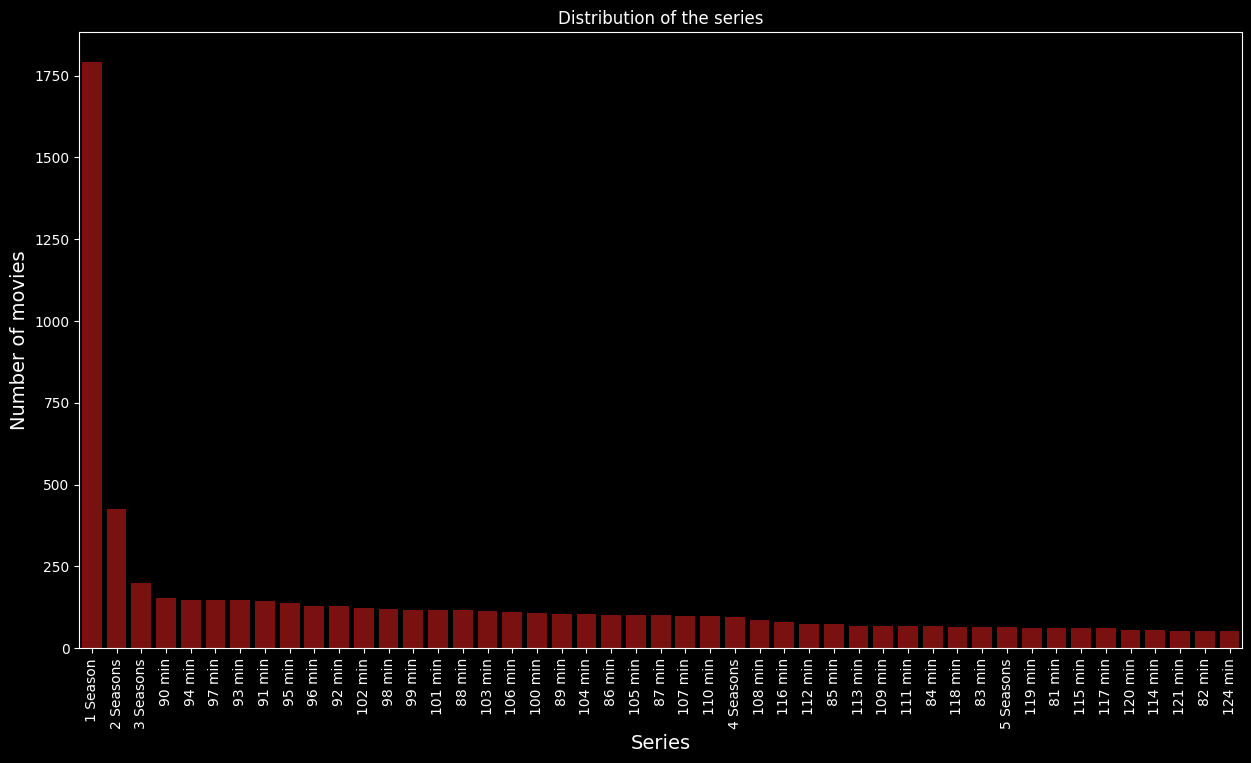

In [15]:
duration_count = df['duration'].value_counts()
duration_df = pd.DataFrame({'time': duration_count.index,
                           'movies': duration_count.values})
# Set a threshold
threshold = 50
# Filterd the common duration
filtered_duration_df = duration_df[duration_df['movies'] > threshold]

# Set style of chart
fig,ax = plt.subplots(figsize=(15,8))
sns.barplot(data = filtered_duration_df, x='time', y='movies', ax=ax, color='darkred')
ax.set_xlabel('Series', fontsize=14,color='white')
ax.set_ylabel('Number of movies', fontsize=14,color='white')
plt.xticks(rotation=90)
plt.title('Distribution of the series')
plt.show()

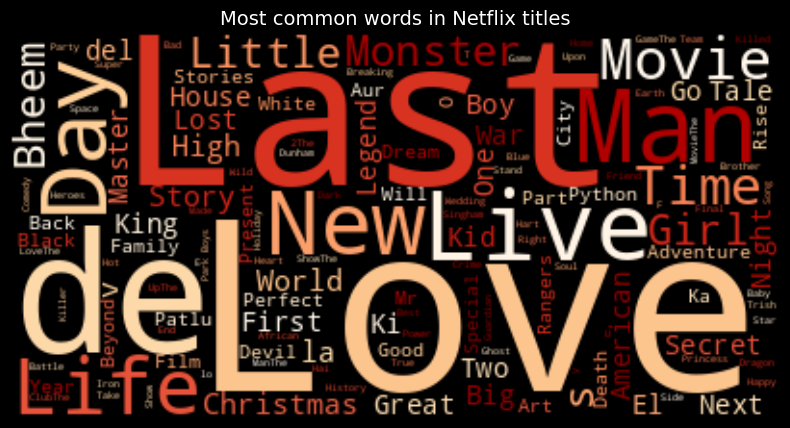

In [16]:
titles = df['title'].values # Extract title from df
text = ''.join(titles) # Create var 'text' tp generate the wordcloud
wordcloud = WordCloud(background_color='black',
                      colormap='OrRd').generate(text) # Generates the word cloud
                      #from the text string containing all the concatenated titles.

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most common words in Netflix titles', color='white', fontsize=14)
plt.axis('off')
#display
plt.show()

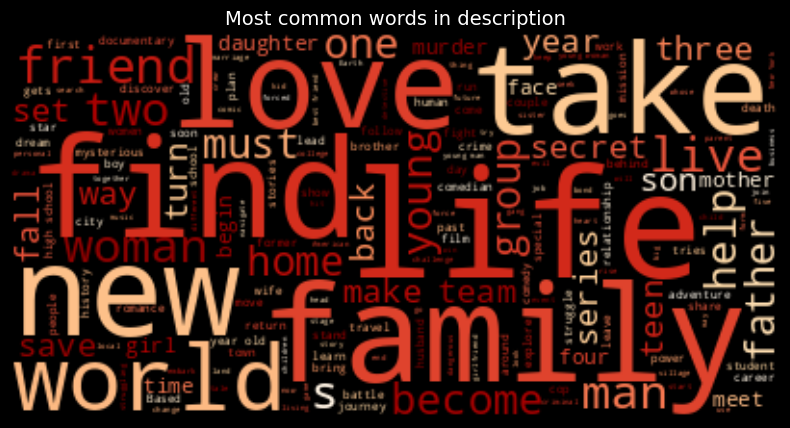

In [17]:
description = df['description'].values
text = ''.join(description)

wordcloud = WordCloud(background_color='black',
                      colormap='OrRd').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most common words in description', fontsize=14, color='white')
plt.axis('off')
plt.show()

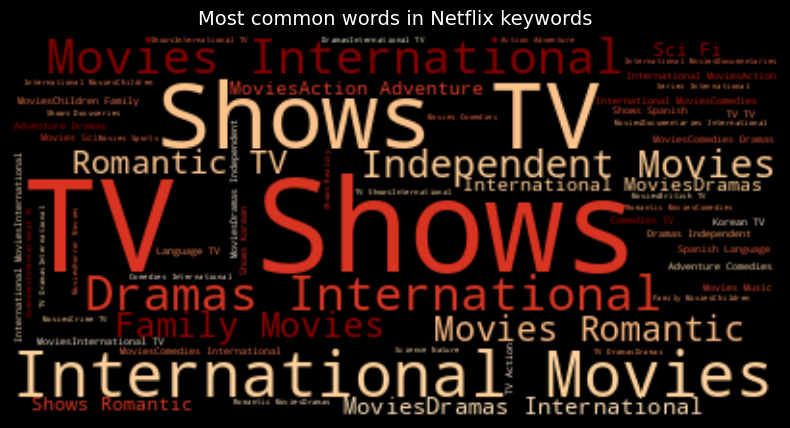

In [18]:
keys = df['listed_in'].values
text = ''.join(keys)

wordcloud = WordCloud(background_color='black',
                      colormap='OrRd').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most common words in Netflix keywords', color='white', fontsize=14)
plt.axis('off')
#display
plt.show()

# 2. FEATURE ENGINEERING:

In [19]:
new_df = df[['title','type','director','cast',
             'rating','listed_in','description']] # Create the new df
             # with the feature importance
new_df.set_index('title',inplace= True)
new_df.head()

,type,director,cast,rating,listed_in,description
title,,,,,,
Dick Johnson Is Dead,Movie,Kirsten Johnson,,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
Blood & Water,TV Show,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
Ganglands,TV Show,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
Jailbirds New Orleans,TV Show,,,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
Kota Factory,TV Show,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [20]:
class TextCleaner:
  def seperate_text(self, texts):
    unique_texts = set() # Create an empty set to store unique texts
    for text in texts.split(','): # Split the text one by one by the comma
      unique_texts.add(text.strip().lower()) # Strip whitespace,
       #convert to lowercase, and add to the set
    return ' '.join(unique_texts)

  def remove_space(self, texts): # This method is intended to remove
  # all spaces from the input text and convert the text to lowercase.
    return texts.replace(' ','').lower()

  def remove_punc(self, texts):
    texts = texts.lower()
    texts = texts.translate(str.maketrans('','', string.punctuation))
    #Creates a translation table that maps punctuation characters to None,
    #effectively removing them.
    return ' '.join(texts.split())

  def clean_text(self, texts):
        texts = self.separate_text(texts) # Call the 'separate_text' method
                    #to clean and split the text
        texts = self.remove_space(texts) # Call the 'remove_space' method
                    #to remove spaces
        texts = self.remove_punc(texts) # Call the 'remove_punc' method
                    #to remove punctuation
        return texts


In [21]:
cleaner = TextCleaner()
new_df['type'] = new_df['type'].apply(cleaner.remove_space)
new_df['director'] = new_df['director'].apply(cleaner.seperate_text)
new_df['cast'] = new_df['cast'].apply(cleaner.seperate_text)
new_df['rating'] = new_df['rating'].apply(cleaner.remove_space)
new_df['listed_in'] = new_df['listed_in'].apply(cleaner.seperate_text)
new_df['description'] = new_df['description'].apply(cleaner.remove_punc)

In [22]:
new_df.head()

,type,director,cast,rating,listed_in,description
title,,,,,,
Dick Johnson Is Dead,movie,kirsten johnson,,pg-13,documentaries,as her father nears the end of his life filmma...
Blood & Water,tvshow,,mekaila mathys sandi schultz arno greeff odwa ...,tv-ma,tv mysteries tv dramas international tv shows,after crossing paths at a party a cape town te...
Ganglands,tvshow,julien leclercq,bakary diombera salim kechiouche noureddine fa...,tv-ma,tv action & adventure crime tv shows internati...,to protect his family from a powerful drug lor...
Jailbirds New Orleans,tvshow,,,tv-ma,reality tv docuseries,feuds flirtations and toilet talk go down amon...
Kota Factory,tvshow,,mayur more arun kumar urvi singh alam khan ahs...,tv-ma,romantic tv shows tv comedies international tv...,in a city of coaching centers known to train i...


In [23]:
new_df['BagOfWords'] = new_df.apply(
    lambda row: ' '.join(row.dropna().values), axis=1)
new_df.drop(new_df.columns[:-1], axis=1, inplace=True)
new_df.head()

,BagOfWords
title,
Dick Johnson Is Dead,movie kirsten johnson pg-13 documentaries as ...
Blood & Water,tvshow mekaila mathys sandi schultz arno gree...
Ganglands,tvshow julien leclercq bakary diombera salim k...
Jailbirds New Orleans,tvshow tv-ma reality tv docuseries feuds fli...
Kota Factory,tvshow mayur more arun kumar urvi singh alam ...


In [24]:
# Create a matrix to get an overall view
# of the frequency of the words in the Bag of Words (BoW)
tfid = TfidfVectorizer()
tfid_matrix = tfid.fit_transform(new_df['BagOfWords'])
tfid_matrix

<8807x52053 sparse matrix of type '<class 'numpy.float64'>'
	with 381860 stored elements in Compressed Sparse Row format>

In [25]:
# Using method Cosine-similarity to get the relationship among them
cosine_sim = cosine_similarity(tfid_matrix, tfid_matrix)
cosine_sim

array([[1.        , 0.00504833, 0.02011193, ..., 0.01065369, 0.02109898,
        0.03048859],
       [0.00504833, 1.        , 0.01714561, ..., 0.00103121, 0.        ,
        0.00481712],
       [0.02011193, 0.01714561, 1.        , ..., 0.00560911, 0.01042642,
        0.0333502 ],
       ...,
       [0.01065369, 0.00103121, 0.00560911, ..., 1.        , 0.05649084,
        0.00600011],
       [0.02109898, 0.        , 0.01042642, ..., 0.05649084, 1.        ,
        0.01046521],
       [0.03048859, 0.00481712, 0.0333502 , ..., 0.00600011, 0.01046521,
        1.        ]])

In [26]:
np.save('tdif_matrix.npy', tfid_matrix)
np.save('cosine_sim_matrix.npy', cosine_sim)

In [27]:
with open('tfidf_vectorizer.pkl', 'wb') as f:
  pickle.dump(tfid,f)

# 3. PREPARE DATA BUILD THE SYSTEM:

In [28]:
final_df = df[['title', 'type']]
final_df.head()

,title,type
0,Dick Johnson Is Dead,Movie
1,Blood & Water,TV Show
2,Ganglands,TV Show
3,Jailbirds New Orleans,TV Show
4,Kota Factory,TV Show


In [29]:
final_df.to_csv('movie_data.csv',index=False)

# 4.RECOMMENDATION SYSTEM

In [49]:
import re
# Create a class consists of several step to build a recommendation system
class NetflixRec:
    def __init__(self, df, cosine_sim):
      self.df = df
      self.cosine_sim = cosine_sim

    # Function recommendation
    def recommendation(self, title, total_result=5, threshold=0.5):
      idx = self.find_id(title) # Create an index for the title
                            # we want to create a list of similarity
      if idx == -1: # The title is failed to find
        return 'Sorry. We do not have this show.'

       # Calculate similarity based on the cosine_sim matrix
      self.df['similarity'] = self.cosine_sim[idx]
      sort_df = self.df.sort_values(by='similarity',
                                    ascending=False)[1:total_result+1]
                                    # Based on the ordered list
      movies = sort_df['title'][sort_df['type']=='Movie'] # Sorted by the type
      tv_shows = sort_df['title'][sort_df['type']=='TV Show']

      similar_movies = []
      similar_tv_shows = []

      # Append the corresponding movie/tv show into the list
      for i, movie in enumerate(movies):
        similar_movies.append('{}. {}'.format(i+1, movie))

      for i, tv_show in enumerate(tv_shows):
        similar_tv_shows.append('{}. {}'.format(i+1, tv_show))

      return similar_movies, similar_tv_shows

    # Set index for the list
    def find_id(self, name):
      name_lower = name.lower()
      matches = self.df[self.df['title'].str.lower().str.contains(name_lower)]
      if not matches.empty:
            return matches.index[0]  # Return the first match index
      return -1

In [50]:
netflix_rec = NetflixRec(final_df, cosine_sim)

# The user input the title they wanna find the similarity
title = input('The movie/Tv show title: ')
movies, tv_shows = netflix_rec.recommendation(title,
                                              total_result=10,
                                              threshold=0.5)

print('Similar Movie(s) list:')
for movie in movies:
  print(movie)

print('\nSimilar TV show(s) list:')
for tv_show in tv_shows:
  print(tv_show)



The movie/Tv show title: dick johnson is dead
Similar Movie(s) list:
1. How to Be a Player
2. End Game
3. Midnight Special
4. The Death and Life of Marsha P. Johnson
5. Small Soldiers
6. Woodshock
7. A Gray State
8. Win It All

Similar TV show(s) list:
1. New Girl
2. Barbie Dreamhouse Adventures
